# Pencil falling 04-17-25

Thu, 4/17/2025 4:40 PM  After diversions, I return to this problem initiated in gemini session 

*Pencil Balancing and Falling Physics 04-14-25* with model Deep Research with 2.5 Pro. 
The generated code had several problems that were difficult to fix. The problem may be associated with use of the Deep Research model 


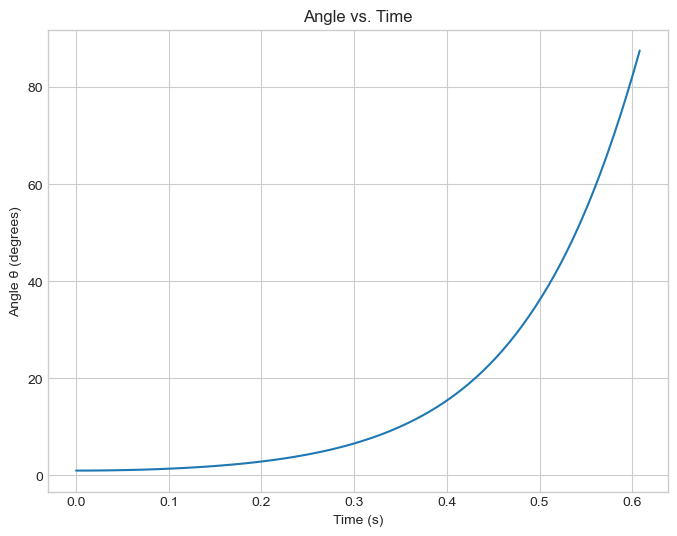

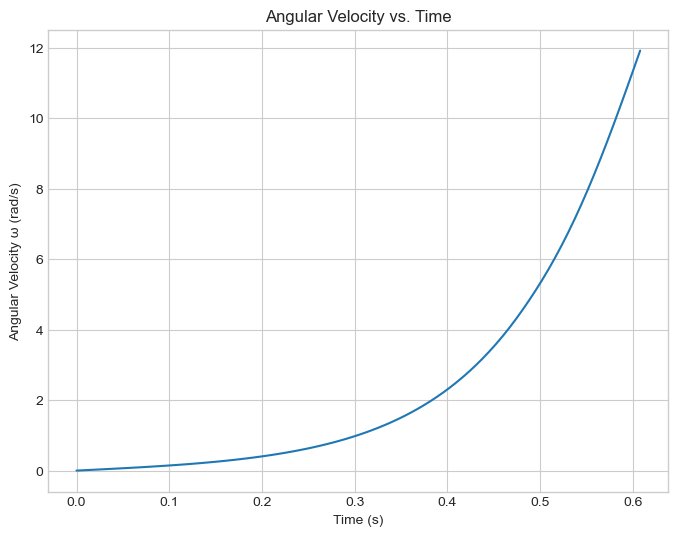

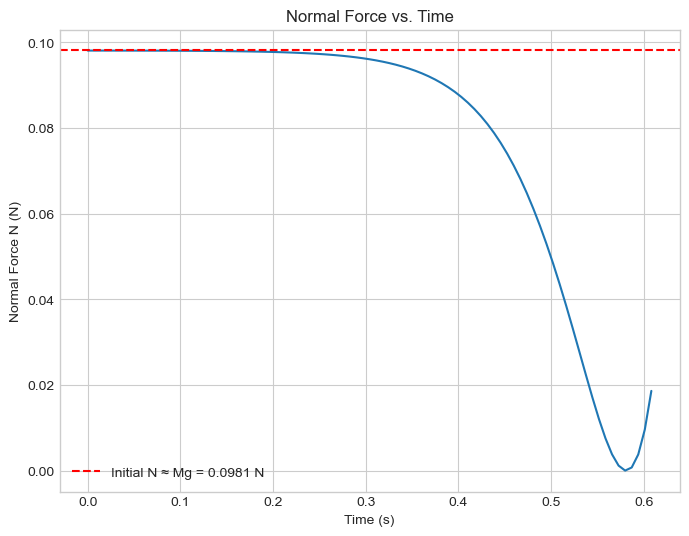

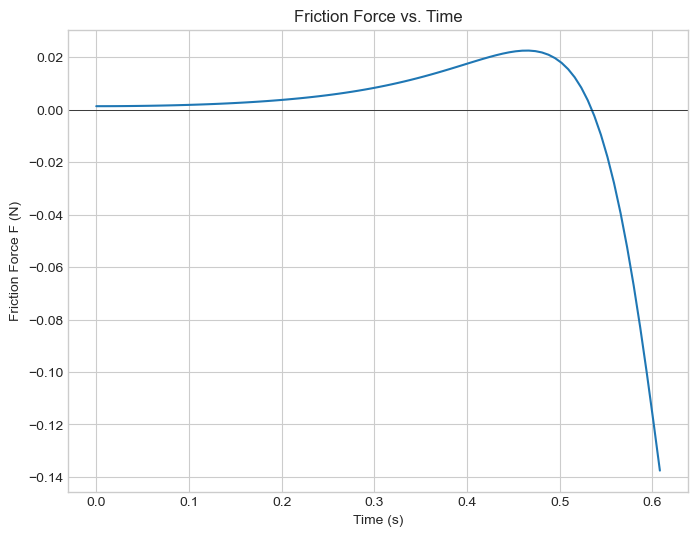

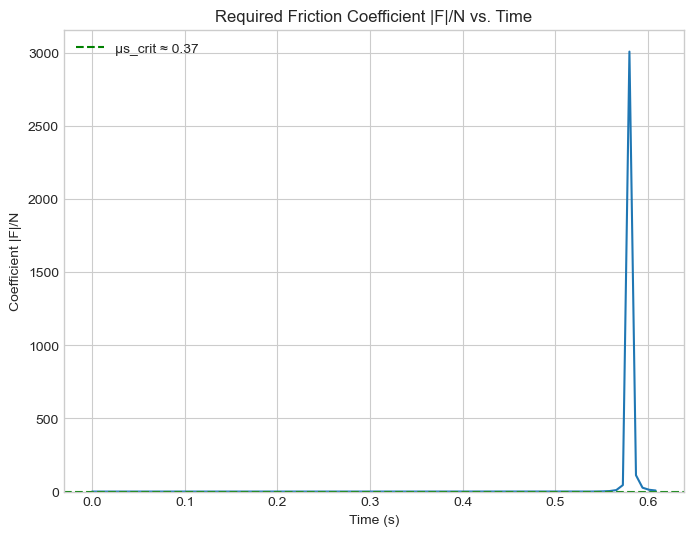

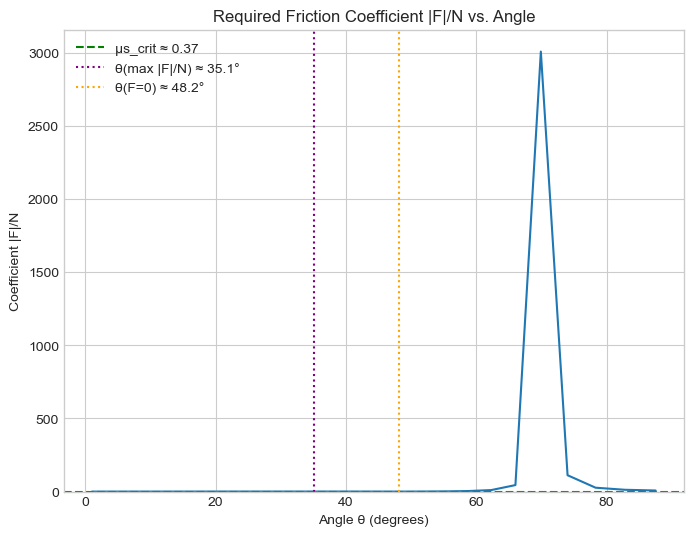

DIAG slip_indices = (array([65, 66, 67, 68, 69, 70, 71, 72, 73, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86], dtype=int64),) first_slip_index = 65
DIAG t_slip = 0.45959595959595956 theta_slip_deg = 25.66496132384892

For μs = 0.3:
  Slipping predicted to start around t ≈ 0.460 s
  Corresponding angle θ ≈ 25.66 degrees
  Direction of impending slip: Forward

For μs = 0.5:
  Slipping predicted to start around t ≈ 0.544 s
  Corresponding angle θ ≈ 52.29 degrees
  Direction of impending slip: Backward


In [9]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- 1. Physical Constants ---
g = 9.81  # Gravitational acceleration (m/s^2)
L = 0.2   # Length of the pencil (m)
M = 0.01  # Mass of the pencil (kg)

# --- 2. Initial Conditions ---
theta_0_deg = 1.0  # Initial angle in degrees
theta_0 = np.radians(theta_0_deg) # Convert initial angle to radians
omega_0 = 0.0  # Initial angular velocity (rad/s)
y0 = [theta_0, omega_0] # Initial state vector [theta, omega]

# --- 3. Time Span and Evaluation Points ---
t_start = 0.0
t_end = 0.7  # Simulation end time (seconds) - adjust as needed
t_span = [t_start, t_end]
# Evaluate solution at 100 points within the span for smooth plots
t_eval = np.linspace(t_start, t_end, 100)

# --- 4. Define the System of ODEs ---
def pencil_ode(t, y, g, L):
    """
    Defines the system of first-order ODEs for the falling pencil (no-slip).

    Args:
        t (float): Time.
        y (list or np.array): State vector [theta, omega].
        g (float): Gravitational acceleration.
        L (float): Pencil length.

    Returns:
        list: Derivatives [d(theta)/dt, d(omega)/dt].
    """
    theta, omega = y
    dtheta_dt = omega
    # d(omega)/dt = (3 * g / (2 * L)) * sin(theta) [1, 2]
    domega_dt = (3.0 * g / (2.0 * L)) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# --- 5. Solve the ODE System ---
# Use solve_ivp to integrate the ODEs
# dense_output=True allows interpolation at any time point
sol = solve_ivp(
    pencil_ode,
    t_span,
    y0,
    args=(g, L), # Pass additional arguments (g, L) to the ODE function
    method='RK45', # Standard Runge-Kutta method
    t_eval=t_eval, # Times at which to store the computed solution
    dense_output=True # Generate a continuous solution
)

# --- 6. Extract Solution Arrays ---
t = sol.t
theta = sol.y[0, :] # Angle theta(t)
omega = sol.y[1, :] # Angular velocity omega(t)

# Ensure theta does not exceed pi/2 (90 degrees) for physical relevance in this phase
valid_indices = theta <= np.pi/2
t = t[valid_indices]
theta = theta[valid_indices]
omega = omega[valid_indices]

# --- 7. Calculate Normal and Friction Forces ---
# N(t) = (M * g / 4) * (3 * cos(theta) - 1)^2 [1, 3]
# Note: The formula in [1] simplifies to this one.
N = (M * g / 4.0) * (3.0 * np.cos(theta) - 1.0)**2

# F(t) = (3 * M * g / 4) * sin(theta) * (3 * cos(theta) - 2) [1, 3]
# Note: The formula in [1] simplifies to this one. F is negative initially.
F = (3.0 * M * g / 4.0) * np.sin(theta) * (3.0 * np.cos(theta) - 2.0)

# --- 8. Calculate Friction Ratio for Slip Analysis ---
# Calculate the ratio |F(t)| / N(t), avoiding division by zero if N becomes very small
# Add a small epsilon to N in the denominator for numerical stability
epsilon = 1e-15
friction_ratio = np.abs(F) / (N + epsilon)

# --- 9. Plotting Results (Individual Plots) ---
plt.style.use('seaborn-v0_8-whitegrid') # Use a clean plot style

# Plot 1: Angle vs. Time
plt.figure(figsize=(8, 6))
plt.plot(t, np.degrees(theta))
plt.title('Angle vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Angle θ (degrees)')
plt.grid(True)

# Plot 2: Angular Velocity vs. Time
plt.figure(figsize=(8, 6))
plt.plot(t, omega)
plt.title('Angular Velocity vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Angular Velocity ω (rad/s)')
plt.grid(True)

# Plot 3: Normal Force vs. Time
plt.figure(figsize=(8, 6))
plt.plot(t, N)
plt.title('Normal Force vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Normal Force N (N)')
plt.axhline(M*g, color='r', linestyle='--', label=f'Initial N ≈ Mg = {M*g:.4f} N')
plt.legend()
plt.grid(True)

# Plot 4: Friction Force vs. Time
plt.figure(figsize=(8, 6))
plt.plot(t, F)
plt.title('Friction Force vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Friction Force F (N)')
plt.axhline(0, color='k', linestyle='-', linewidth=0.5)
plt.grid(True)

# Plot 5: Required Friction Coefficient |F|/N vs. Time
plt.figure(figsize=(8, 6))
plt.plot(t, friction_ratio)
plt.title('Required Friction Coefficient |F|/N vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Coefficient |F|/N')
plt.axhline(0.3706, color='g', linestyle='--', label=f'μs_crit ≈ 0.37') # Mark critical value [1, 4]
plt.legend()
plt.ylim(bottom=0) # Ratio cannot be negative
plt.grid(True)

# Plot 6: Required Friction Coefficient |F|/N vs. Angle
plt.figure(figsize=(8, 6))
plt.plot(np.degrees(theta), friction_ratio)
plt.title('Required Friction Coefficient |F|/N vs. Angle')
plt.xlabel('Angle θ (degrees)')
plt.ylabel('Coefficient |F|/N')
plt.axhline(0.3706, color='g', linestyle='--', label=f'μs_crit ≈ 0.37') # Mark critical value [1, 4]
plt.axvline(np.degrees(np.arccos(9/11)), color='purple', linestyle=':', label=f'θ(max |F|/N) ≈ 35.1°') # Angle of max ratio [1, 4]
plt.axvline(np.degrees(np.arccos(2/3)), color='orange', linestyle=':', label=f'θ(F=0) ≈ 48.2°') # Angle where F=0 [1, 5]
plt.legend()
plt.ylim(bottom=0)
plt.grid(True)

# Show all generated plots
plt.show()

# --- 10. Optional Slip Analysis ---
mu_s_test = 0.3
try:
    # Find the indices where the condition is met
    slip_indices = np.where(friction_ratio >= mu_s_test) # Get indices as a 1D array
    if len(slip_indices) > 0:
        # first_slip_index = slip_indices # Get the first index
        first_slip_index = slip_indices[0][0] # Get the first index
        t_slip = t[first_slip_index]
        theta_slip_deg = np.degrees(theta[first_slip_index])
        print(f'DIAG slip_indices = {slip_indices} first_slip_index = {first_slip_index}')
        print(f"DIAG t_slip = {t_slip} theta_slip_deg = {theta_slip_deg}")
        print(f"\nFor μs = {mu_s_test}:")
        print(f"  Slipping predicted to start around t ≈ {t_slip:.3f} s")
        print(f"  Corresponding angle θ ≈ {theta_slip_deg:.2f} degrees")
        # Check the sign of F at the slip point to determine direction
        if F[first_slip_index] < 0:
            print("  Direction of impending slip: Backward") # Slip direction for mu_s < mu_s_crit [3, 4]
        else:
            print("  Direction of impending slip: Forward") # Slip direction for mu_s > mu_s_crit [3, 4]
    else:
        print(f"\nFor μs = {mu_s_test}, slipping does not occur within the simulated time/angle range.")
except IndexError:
    # This catch might be redundant now with the explicit check for len(slip_indices) > 0
    print(f"\nError processing slip condition for μs = {mu_s_test}.")


mu_s_test = 0.5
try:
    # Find the indices where the condition is met
    slip_indices = np.where(friction_ratio >= mu_s_test) # Get indices as a 1D array
    if len(slip_indices) > 0:
        # first_slip_index = slip_indices # Get the first index
        first_slip_index = slip_indices[0][0] # Get the first index
        t_slip = t[first_slip_index]
        theta_slip_deg = np.degrees(theta[first_slip_index])
        print(f"\nFor μs = {mu_s_test}:")
        print(f"  Slipping predicted to start around t ≈ {t_slip:.3f} s")
        print(f"  Corresponding angle θ ≈ {theta_slip_deg:.2f} degrees")
        # Check the sign of F at the slip point to determine direction
        if F[first_slip_index] < 0:
            print("  Direction of impending slip: Backward") # Slip direction for mu_s < mu_s_crit [3, 4]
        else:
            print("  Direction of impending slip: Forward") # Slip direction for mu_s > mu_s_crit [3, 4]
    else:
        print(f"\nFor μs = {mu_s_test}, slipping does not occur within the simulated time/angle range.")
except IndexError:
     # This catch might be redundant now with the explicit check for len(slip_indices) > 0
    print(f"\nError processing slip condition for μs = {mu_s_test}.")